In [1]:
import polars as pl
import numpy as np
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

x1 = 10
x2 = 10
x3 = 55

df = df.with_columns([
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return'),
    pl.col('open').rolling_sum(x1).over('symbol').alias('open_sum')
])

df = df.with_columns([
    pl.col('return').rolling_sum(x2).over('symbol').alias('return_sum')
])

df = df.with_columns([
    (-1 * pl.col('open_sum') * pl.col('return_sum') - (pl.col('open_sum') * pl.col('return_sum')).shift(x3).over('symbol')).alias('alpha008')
])

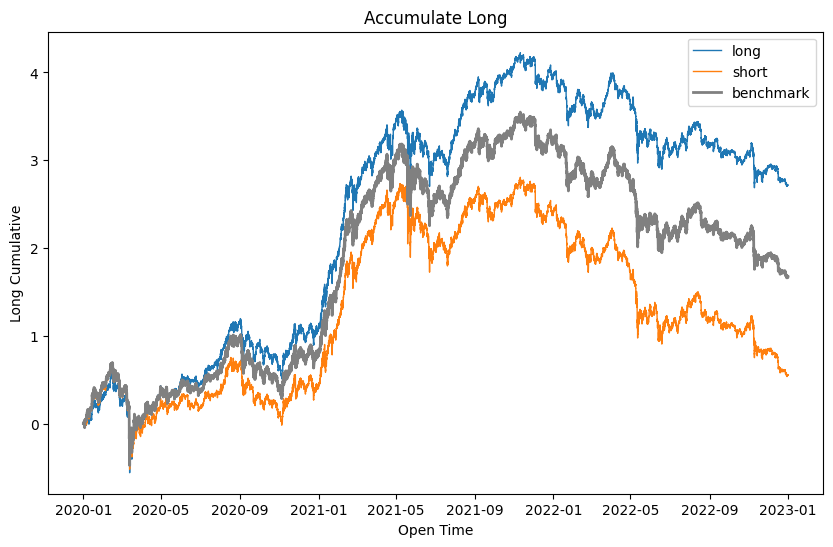

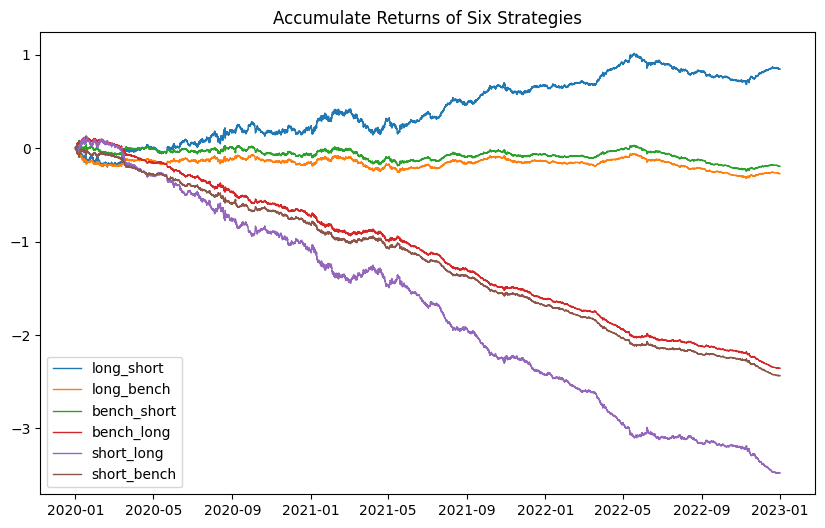

long: 
ann_return = 0.9044  sharpe = 0.8341  maxdd = 0.7187  calmar_ratio = 1.2583  

short: 
ann_return = 0.1843  sharpe = 0.1673  maxdd = 0.7128  calmar_ratio = 0.2586  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = 0.2821  sharpe = 1.0071  maxdd = 0.2186  calmar_ratio = 1.2901  

long_bench: 
ann_return = -0.0912  sharpe = -0.6206  maxdd = 0.3495  calmar_ratio = -0.2608  

bench_long: 
ann_return = -0.7848  sharpe = -5.3434  maxdd = 2.1988  calmar_ratio = -0.3569  

short_long: 
ann_return = -1.1581  sharpe = -4.135  maxdd = 3.2127  calmar_ratio = -0.3605  

short_bench: 
ann_return = -0.8112  sharpe = -5.3999  maxdd = 2.3831  calmar_ratio = -0.3404  

bench_short: 
ann_return = -0.0648  sharpe = -0.4313  maxdd = 0.3053  calmar_ratio = -0.2122  



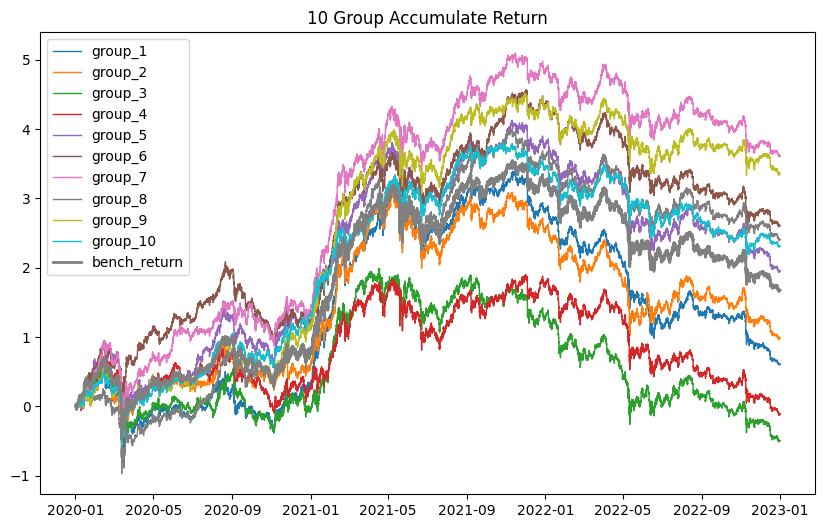

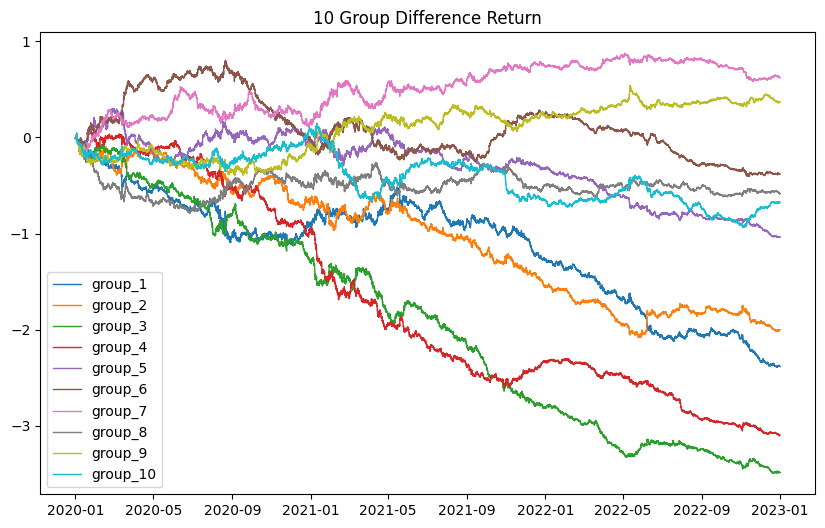

group_1: 
ann_return = 0.2015  sharpe = 0.1806  maxdd = 0.875  calmar_ratio = 0.2303  

group_2: 
ann_return = 0.3292  sharpe = 0.28  maxdd = 0.7919  calmar_ratio = 0.4157  

group_3: 
ann_return = -0.1651  sharpe = -0.1424  maxdd = 0.8352  calmar_ratio = -0.1977  

group_4: 
ann_return = -0.0349  sharpe = -0.0303  maxdd = 0.6976  calmar_ratio = -0.0501  

group_5: 
ann_return = 0.6506  sharpe = 0.5543  maxdd = 0.5663  calmar_ratio = 1.1488  

group_6: 
ann_return = 0.8685  sharpe = 0.7389  maxdd = 0.5765  calmar_ratio = 1.5065  

group_7: 
ann_return = 1.2026  sharpe = 1.037  maxdd = 0.589  calmar_ratio = 2.0417  

group_8: 
ann_return = 0.8012  sharpe = 0.6973  maxdd = 0.9706  calmar_ratio = 0.8255  

group_9: 
ann_return = 1.1178  sharpe = 0.9978  maxdd = 0.7133  calmar_ratio = 1.567  

group_10: 
ann_return = 0.7698  sharpe = 0.749  maxdd = 0.6851  calmar_ratio = 1.1236  

-----------------------------------------
group_difference_1: 
ann_return = -0.794  sharpe = -1.8571  maxdd = 

In [2]:
factors = df.select(['open_time', 'symbol', 'alpha008'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()